***Deliverable 1: Search Algorithm Code and its Verification of Correctness***

Implement your search algorithm in a language of your choice. Test your implementation thoroughly for correctness. Provide verification that you have tested your algorithm and that it always operates correctly.


In [ ]:
# the search algorithm:
def Search(A, K):
    for i in range(len(A)):
      # go through the array and check every entry against the key
        if A[i] == K:
            return i
    return len(A)

In [ ]:
# test it for correctness
import numpy as np
import random
#Dr. Brown: may need to run pip install pygorithm in terminal
from pygorithm.searching import linear_search

def main():
    #arrays generated to check
    test_array1 = np.zeros(5)
    test_array2 = np.zeros(5)
    test_array3 = np.zeros(5)

    for i in range(5):
      #populate values
        test_array1[i] = random.randint(0,5)
        test_array2[i] = random.randint(0,5)
        test_array3[i] = random.randint(0,5)

    #print out arrays
    print("Array 1: " + str(test_array1))
    print("Array 2: " + str(test_array2))
    print("Array 3: " + str(test_array3))

    #generate search keys and run function
    k1 = random.randint(0,5)
    k2 = random.randint(0,5)
    k3 = random.randint(0,5)
    print("Key 1 for Array1: " + str(k1))
    print("Key 2 for Array2: " + str(k2))
    print("Key 3 for Array3: " + str(k3))

    # change values of search in case of not finding result for the imported library search
    # originally returns -1, changing to the length of the array
    value1 = linear_search.search(test_array1,k1)
    if value1 == -1:
        value1 = len(test_array1)
    value2 = linear_search.search(test_array2,k2)
    if value2 == -1:
        value2 = len(test_array1)
    value3 = linear_search.search(test_array3,k3)
    if value3 == -1:
        value3 = len(test_array1)

    #Check my output versus python library output
    print("My results...")
    print("My result array 1: "+ str(Search(test_array1, k1) )+ ". Python result array 1: " + str(value1))
    print("My result array 2: " + str(Search(test_array2, k2)) + ". Python result array 2: " + str(value2))
    print("My result array 3: " + str(Search(test_array3, k3)) + ". Python result array 3: " + str(value3))

main()

Array 1: [5. 3. 1. 2. 5.]
Array 2: [3. 1. 0. 2. 1.]
Array 3: [4. 2. 4. 0. 4.]
Key 1 for Array1: 0
Key 2 for Array2: 4
Key 3 for Array3: 5
My results...
My result array 1: 5. Python result array 1: 5
My result array 2: 5. Python result array 2: 5
My result array 3: 5. Python result array 3: 5


Deliverable 2: The Data Set.

The speed at which your algorithm searches will depend a lot on the contents of A[n] and the likelihood of finding a particular K. In this project, you'll use English text and check how long it takes to find four characters e, m, Q, % in various length arrays. To do this, you'll have to first get some English text. Pick your favorite book from Project Gutenburg and then extract the text from the HTML page. Ensure that no text from your source ever appears in more than one single array in your dataset. Return a precise description of your dataset and the code which you used to generate it. Reproducibility is crucial here: if I try to replicate your results I should be able to do so with minimal efforts.

In [ ]:
#source: stack overflow question cited in the assignment, but modified
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = "https://www.gutenberg.org/cache/epub/2600/pg2600-images.html"
html = urlopen(url).read()
soup = BeautifulSoup(html, features="html.parser")

# kill all script and style elements
for script in soup(["script", "style"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

arrays = [] #store all the lists
elems = 0
index_elems = 0
for n in range(1000, 11000, 1000):
    #n number elements of 50 arrays of each element length
    for i in range(50):
        # 50 arrays of length elems
        end_index = index_elems + n
        arrays.append(text[index_elems:end_index]) # add an array to arrays
        index_elems = end_index



The data set consists of 50 arrays of sizes varying from 1000, 2000, 3000,..., 10,000 entries. It is stored in a list of lists. The data is uncleaned, so spaces and extraneous characters from the book were added rather than the full English text alone to the populate the arrays. Hoping this effect may catch our "white whale" of a % sign in the text, but most likely not. The arrays pull sequentially from the text in increments of the given indixes that are defined by the variable array length n. The text source is "War and Peace" by Leo Tolstoy: a work that, like many Russian classics written in the 1860s, attests to the raw power of the ego to destroy nations or build peaceful, utopic existence... An important work whose teachings continue to be relevant in the current day and age, but his is not a classics course, so let's continue.

Deliverable 3: The search for worst case

A plot showing the worst-case empirical runtime of your sorting algorithm as a function of n with a separate trace for each of the test characters e,m,Q,%. (note: n is on the horizontal axis and runtime is on the vertical). If your plots show unexpected behavior, discuss.

In [ ]:
import numpy as np
#stores worst case runtime for a given character for n size 1000 through 10,000 translated to a zero-based index for later graphing
# a dictionary clarifies the worst runtime per array size n
dict_e_worst = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_m_worst = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_q_worst = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_p_worst = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}

for array in arrays:
  #index to keep track of the plot of per given arrays of given size n what was the worst runtime

  #search for each element in the given array iterating over all arrays
  temp_e = Search(array, 'e')
  temp_m = Search(array, 'm')
  temp_q = Search(array, 'Q')
  temp_p = Search(array, '%')

  #If the returned index is worst than the worst, replace the worst for the given array of size n
  if dict_e_worst[len(array)] < temp_e:
    dict_e_worst[len(array)] = temp_e
  if dict_m_worst[len(array)] < temp_m:
    dict_m_worst[len(array)] = temp_m
  if dict_q_worst[len(array)] < temp_q:
    dict_q_worst[len(array)] = temp_q
  if dict_p_worst[len(array)] < temp_p:
    dict_p_worst[len(array)] = temp_p

#uncomment the code below to look at the unprocessed key value pairs of the data set.
'''
print(dict_e_worst)
print(dict_m_worst)
print(dict_q_worst)
print(dict_p_worst)
'''


'\nprint(dict_e_worst)\nprint(dict_m_worst)\nprint(dict_q_worst)\nprint(dict_p_worst)\n'

Deliverable 3: The Worst-Case Plot

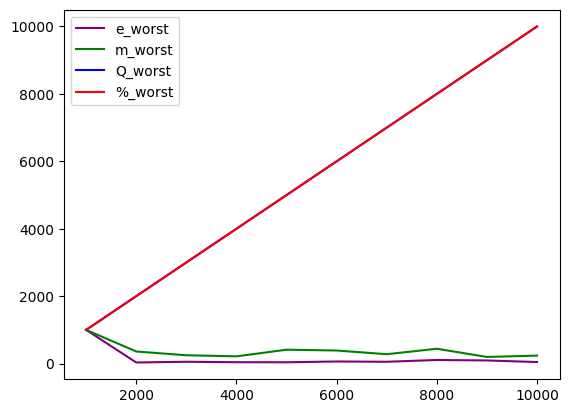

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#set x-axis and y-axis values
n = np.arange(1000, 11000, 1000)


plt.plot(n,dict_e_worst.values(),"purple", label="e_worst")
plt.plot(n, dict_m_worst.values(), "green", label= "m_worst")
plt.plot(n, dict_q_worst.values(), "blue", label= "Q_worst")
plt.plot(n, dict_p_worst.values(), "red", label= "%_worst")
plt.legend()

It is important to note here that Q_worst has a worst-case runtime that runs as bad as %_worst. Therefore, it is hidden behind %_worst in the plot. If you think about the quality of the data, the average written English text source, it makes sense because 'Q' and '%' would be so rarely found in comparison to 'e' and 'm' which occur frequently ('e' occurring more frequently than 'm'). This is depicted best by the fact that, in the worst case condition, e_worst  and m_worst are clearly in the neighborhood of a constant time order of growth, with m_worst having slightly elevated values. %_worst and Q_worst on the otherhand have a linear complexity, which would make sense because from a theoretical approach the worst case runtime of the sequential search algorithm is Theta(n). And, looking for a character that rarely exists or never exists in the text would yield a worst-case result. In worst-case, we clearly see that the data and the search key is influencing the performance of the algorithm.

It is also important to note that there is a spike where it is difficult to find any characters in the first 50 arrays of length 1,000, but this can be attributed to the uncleaned white space in the data set.

Deliverable 4: Best Case

A plot showing the best-case empirical runtime of your algorithm as a function of n with separate traces for each of the test characters e, m, Q, %. Based on these plots, form a conjecture about the best-case runtime of your algorithm. If your plots show any unexpected or strange behavior, discuss. in particular, compare these results to your Deliverable 3 and note any similarities or discrepancies.

In [ ]:
import numpy as np
#stores worst case runtime for a given character for n size 1000 through 10,000 translated to a zero-based index for later graphing

dict_e_best = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}
dict_m_best = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}
dict_q_best = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}
dict_p_best = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}

for array in arrays:
  #search for each element in the given array iterating over all arrays
  temp_e = Search(array, 'e')
  temp_m = Search(array, 'm')
  temp_q = Search(array, 'Q')
  temp_p = Search(array, '%')

  #If the returned index is worst than the worst, replace the worst for the given array of size n
  if dict_e_best[len(array)] > temp_e:
    dict_e_best[len(array)] = temp_e
  if dict_m_best[len(array)] > temp_m:
    dict_m_best[len(array)] = temp_m
  if dict_q_best[len(array)] > temp_q:
    dict_q_best[len(array)] = temp_q
  if dict_p_best[len(array)] > temp_p:
    dict_p_best[len(array)] = temp_p
'''
#uncomment to see output values
print(dict_e_best)
print(dict_m_best)
print(dict_q_best)
print(dict_p_best)
'''

{1000: 0, 2000: 0, 3000: 0, 4000: 0, 5000: 0, 6000: 0, 7000: 0, 8000: 0, 9000: 0, 10000: 0}
{1000: 4, 2000: 0, 3000: 0, 4000: 3, 5000: 0, 6000: 0, 7000: 1, 8000: 0, 9000: 0, 10000: 2}
{1000: 831, 2000: 1113, 3000: 2305, 4000: 3, 5000: 529, 6000: 6000, 7000: 2887, 8000: 4142, 9000: 327, 10000: 2029}
{1000: 1000, 2000: 2000, 3000: 3000, 4000: 4000, 5000: 5000, 6000: 6000, 7000: 7000, 8000: 8000, 9000: 9000, 10000: 10000}


Deliverable 4: The Best-Case Plot

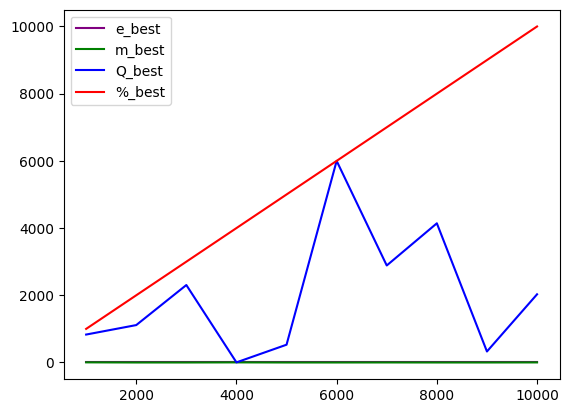

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
#set x-axis and y-axis values
n = np.arange(1000, 11000, 1000)


plt.plot(n,dict_e_best.values(),"purple", label="e_best")
plt.plot(n, dict_m_best.values(), "green", label= "m_best")
plt.plot(n, dict_q_best.values(), "blue", label= "Q_best")
plt.plot(n, dict_p_best.values(), "red", label= "%_best")
plt.legend()

Whoa! Now, we see that there is a clear distinction between %_best runtime and Q_best runtime. Q_best jumps around all over the place, but I would conjecture that you could squeeze Q_best between two constants such that it behaves like n (we'll play with this idea later). %_best has a linear best-case runtime which mirrors the worst-case runtime of %_worst.

e_best and m_best both have relatively the same runtime of constant time. Because this data reflects the best case input of when it could actually run constant time, we could say both functions are in Theta(1).

Here, we see that favorable inputs that occur most often yield results that in application are closer to the predicted results of theory for best-case. Whereas, unfavorable results do not, even in the best of runtimes, perform as we would predict. That is probably due to the fact that a best-case approximation provides a lower-bound approximation of how well an algorithm can and will perform. Given a certain example case, e_best for example, it does perform this well, so we can categorize best-case runtime as Theta(1).

Here again, we see the quality of the data and what exactly we are searching for from the algorithm varies the performance of the same algorithm. This time, in the context of the best-case scenario.

Deliverable 5: Average Case

Deliver a plot showing average-case empirical runtime of your algorithm as a function of n, witha separate trace for e,m, Q, %. Based on these plots, form a conjecture about the average-case runtime of your particular algorithm.

In [ ]:
import numpy as np
import math
#stores average runtime per character

dict_e_ave = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_m_ave = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_q_ave = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}
dict_p_ave = {1000:0, 2000:0, 3000:0, 4000:0, 5000:0, 6000:0, 7000:0, 8000:0, 9000:0, 10000:0}

for array in arrays:
  # search for each element in the given array iterating over all arrays then return the given index
  temp_e = Search(array, 'e')
  temp_m = Search(array, 'm')
  temp_q = Search(array, 'Q')
  temp_p = Search(array, '%')

  # sum up the found indices
  dict_e_ave[len(array)]  += temp_e
  dict_m_ave[len(array)]  += temp_m
  dict_q_ave[len(array)]  += temp_q
  dict_p_ave[len(array)]  += temp_p

for i in range(1000,11000, 1000):
  # divide each sum by the total sample size to yield an average
  dict_e_ave[i] = math.floor(dict_e_ave[i]/50)
  dict_m_ave[i] = math.floor(dict_m_ave[i]/50)
  dict_q_ave[i] = math.floor(dict_q_ave[i]/50)
  dict_p_ave[i] = math.floor(dict_p_ave[i]/50)
'''
#uncomment to see output values
print(dict_e_ave)
print(dict_m_ave)
print(dict_q_ave)
print(dict_p_ave)
'''

{1000: 130, 2000: 9, 3000: 9, 4000: 12, 5000: 8, 6000: 9, 7000: 11, 8000: 10, 9000: 10, 10000: 12}
{1000: 179, 2000: 66, 3000: 64, 4000: 58, 5000: 57, 6000: 72, 7000: 58, 8000: 72, 9000: 54, 10000: 65}
{1000: 996, 2000: 1982, 3000: 2986, 4000: 3887, 5000: 4824, 6000: 6000, 7000: 6811, 8000: 7881, 9000: 8299, 10000: 9620}
{1000: 1000, 2000: 2000, 3000: 3000, 4000: 4000, 5000: 5000, 6000: 6000, 7000: 7000, 8000: 8000, 9000: 9000, 10000: 10000}


Deliverable 5: The Average Case Plot

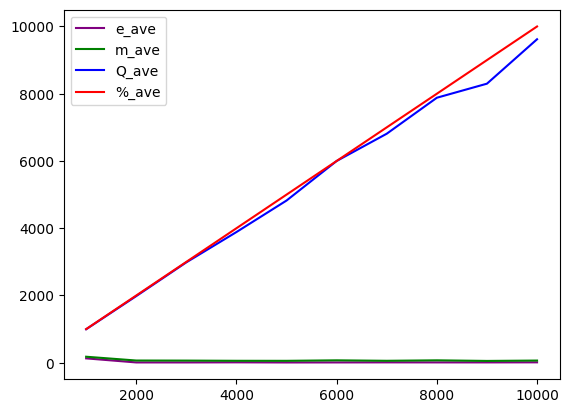

In [ ]:
plt.plot(n,dict_e_ave.values(),"purple", label="e_ave")
plt.plot(n, dict_m_ave.values(), "green", label= "m_ave")
plt.plot(n, dict_q_ave.values(), "blue", label= "Q_ave")
plt.plot(n, dict_p_ave.values(), "red", label= "%_ave")
plt.legend()

Here, we see that on average %_ave and Q_ave runtimes behave linearly, so Theta(n). Whereas e_ave and m_ave on average behave like constant time, Theta(1).

Clearly now, we can see that the quality of the data and the expected outputs influence the results of an algorithms runtime in the worst, best, and average case scenarios. I would conjecture that in the case of best-case data (data that will yield results with the fastest runtime) the worst, best, and average case functions would look the same. That is, they all fall into the same complexity class. Likewise, in the event of worst-case data (data that will yield results with the slowest runtime) the worst, best, and average case functions would look the same.

Let's test it for grins and giggles. Choosing 'm' sequential search results as our best case data and 'Q' sequential search results  as our worst case because I think they will be a little more interesting to look at then 'e' and '%'.

***The Search for 'm':***

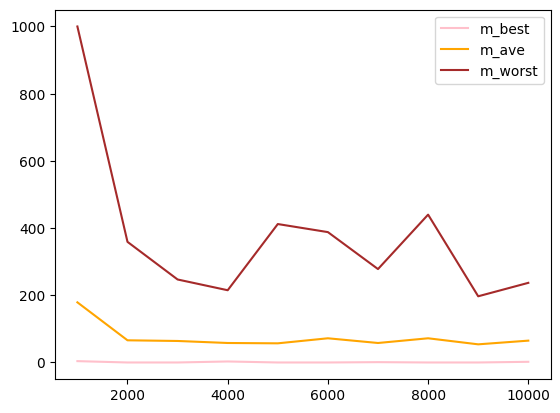

In [ ]:
# m results
plt.plot(n,dict_m_best.values(),"pink", label="m_best")
plt.plot(n, dict_m_ave.values(), "orange", label= "m_ave")
plt.plot(n, dict_m_worst.values(), "brown", label= "m_worst")
plt.legend()

I would say that you can see clearly that you could box all of these results in Theta of constant time... That is, a multiplication of some constants as a function of n. Let's do it.

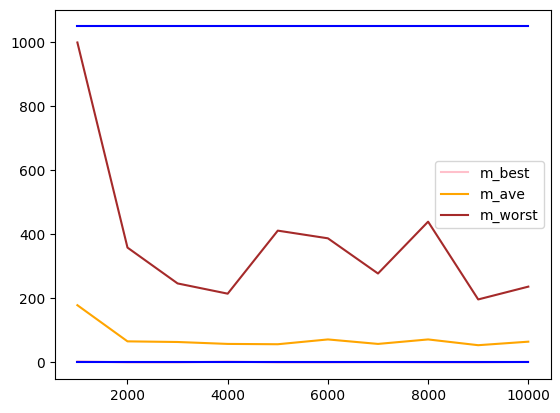

In [ ]:
array_lower_bound = np.ones(10)
array_upper_bound = array_lower_bound * 1050
plt.plot(n,dict_m_best.values(),"pink", label="m_best")
plt.plot(n, dict_m_ave.values(), "orange", label= "m_ave")
plt.plot(n, dict_m_worst.values(), "brown", label= "m_worst")
plt.plot(n, array_lower_bound, "blue")
plt.plot(n, array_upper_bound, "blue")
plt.legend()

So regardless of best, worst, average case, the search for 'm' is always in constant time Theta(1) in the given data set by the squeeze theorem.

***The Search for "Q":***

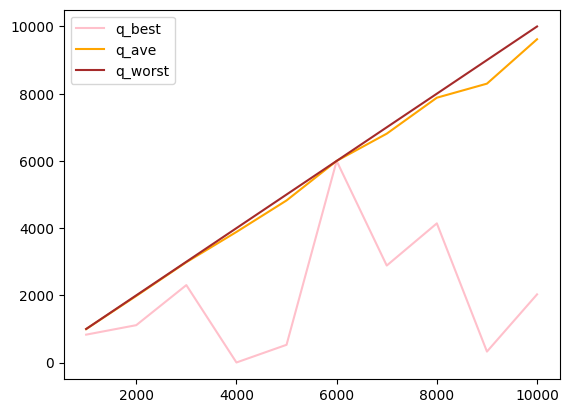

In [ ]:
# q results
plt.plot(n,dict_q_best.values(),"pink", label="q_best")
plt.plot(n, dict_q_ave.values(), "orange", label= "q_ave")
plt.plot(n, dict_q_worst.values(), "brown", label= "q_worst")
plt.legend()

I would conjecture that we can bound these functions by constants multiplying n as a function of n. Let's try...

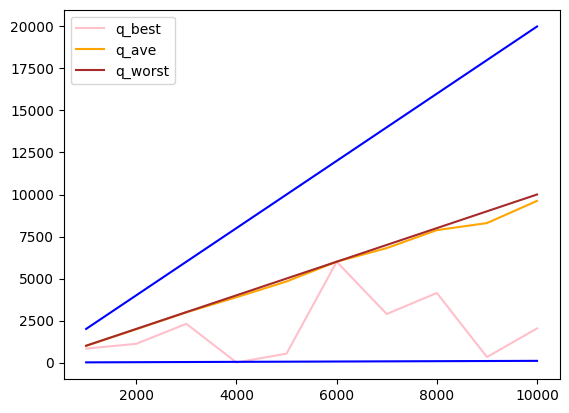

In [ ]:
lower_bound = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}
upper_bound = {1000:1000, 2000:2000, 3000:3000, 4000:4000, 5000:5000, 6000:6000, 7000:7000, 8000:8000, 9000:9000, 10000:10000}

for i in range(1000, 11000, 1000):
  lower_bound[i] = lower_bound[i] * 0.01
  upper_bound[i] = upper_bound[i] * 2
plt.plot(n,dict_q_best.values(),"pink", label="q_best")
plt.plot(n, dict_q_ave.values(), "orange", label= "q_ave")
plt.plot(n, dict_q_worst.values(), "brown", label= "q_worst")
plt.plot(n, lower_bound.values(), "blue")
plt.plot(n, upper_bound.values(), "blue")
plt.legend()

I would argue that this is bounded by positive constants multiplying n. So regardless of best, worst, or average case this is Theta(n) by the squeeze theorem.

Final Regards:

It seems like a logical conclusion to me that data input, key, and projected output can greatly alter an algorithm's efficiency in practice. It's interesting, what I would perceive as, the vaccuum we put ourselves in when we talk about best, worst, and average runtimes.  Worst pertaining to the absolute worst case inputs (described above) and best pertaining to the absolute best given the data. Real world data samples are more complicated than theoretical, arguable, oversimplifications of the complexities of runtimes which vary widely in the ranges of results given different input data.